In [38]:
import pandas as pd

# datasets
pop_df = pd.read_excel('pop.xlsx')
gdp_pcap_df = pd.read_excel('gdp_pcap.xlsx')
lex_df = pd.read_excel('lex.xlsx')

# reshape the data 
pop_long = pop_df.melt(id_vars=['country'], var_name='year', value_name='Population')
gdp_pcap_long = gdp_pcap_df.melt(id_vars=['country'], var_name='year', value_name='GDP_per_Capita')
lex_long = lex_df.melt(id_vars=['country'], var_name='year', value_name='Life_Expectancy')

# merge the datasets
merged_df = pd.merge(pop_long, gdp_pcap_long, on=['country', 'year'], how='inner')
merged_df = pd.merge(merged_df, lex_long, on=['country', 'year'], how='inner')

# Missing values
merged_df['Life_Expectancy'] = merged_df['Life_Expectancy'].fillna(merged_df['Life_Expectancy'].mean())

# Clean and standardize Population
def convert_population(value):
    if isinstance(value, str):
        value = value.replace(',', '')
        if 'M' in value:
            return float(value.replace('M', '')) * 1_000_000
        elif 'k' in value:
            return float(value.replace('k', '')) * 1_000
    return pd.to_numeric(value, errors='coerce')

merged_df['Population'] = merged_df['Population'].apply(convert_population)

# Arranging the values in GDP_per_Capita 
def clean_gdp_values(value):
    if isinstance(value, str):
        value = value.replace(',', '')  # Virgülleri kaldır
        if 'k' in value:  # 'k' varsa, 1000 ile çarp
            return float(value.replace('k', '')) * 1_000
        elif 'M' in value:  # Eğer "M" varsa, 1.000.000 ile çarp
            return float(value.replace('M', '')) * 1_000_000
    return pd.to_numeric(value, errors='coerce')  # Geriye kalan değerleri sayısala çevir

# Cleaning GDP_per_Capita values
merged_df['GDP_per_Capita'] = merged_df['GDP_per_Capita'].apply(clean_gdp_values)

# Filling the missing values
merged_df['GDP_per_Capita'] = merged_df['GDP_per_Capita'].fillna(merged_df['GDP_per_Capita'].mean())

# Rename columns
merged_df.rename(columns={'Population': 'Population', 'GDP_per_Capita': 'GDP_per_Capita',
                          'Life_Expectancy': 'Life_Expectancy'}, inplace=True)

# Data Exploration
print("First 5 rows of the dataset:")
print(merged_df.head())
print("\nLast 5 rows of the dataset:")
print(merged_df.tail())

# Number of unique countries
unique_countries = merged_df['country'].nunique()
print(f"\nNumber of unique countries: {unique_countries}")

# Extract data for a specific year (e.g., 2000)
data_2000 = merged_df[merged_df['year'] == 2000]
print("\nData for the year 2000:")
print(data_2000)

# Filter data for countries with a population >= 1 million
filtered_df = merged_df[merged_df['Population'] >= 1_000_000]
print("\nCountries with Population >= 1 Million:")
print(filtered_df)

# Sort by Life Expectancy
sorted_by_life_expectancy = merged_df.sort_values(by='Life_Expectancy', ascending=True)
print("\nSorted by Life Expectancy:")
print(sorted_by_life_expectancy.head())

# Categorize population
def categorize_population(pop):
    if pop > 50_000_000:
        return 'High'
    elif pop > 10_000_000:
        return 'Medium'
    else:
        return 'Low'

merged_df['Population_Category'] = merged_df['Population'].apply(categorize_population)

# Average GDP per capita by country
avg_gdp = merged_df.groupby('country')['GDP_per_Capita'].mean()
print("\nAverage GDP per Capita by Country:")
print(avg_gdp)

# Country with highest life expectancy in 2000
if not data_2000.empty:
    highest_life_expectancy_2000 = data_2000.loc[data_2000['Life_Expectancy'].idxmax()]
    print("\nCountry with the highest life expectancy in 2000:")
    print(highest_life_expectancy_2000)


First 5 rows of the dataset:
       country  year  Population  GDP_per_Capita  Life_Expectancy
0  Afghanistan  1800   3280000.0           481.0        28.200000
1       Angola  1800   1570000.0           373.0        27.000000
2      Albania  1800    400000.0           469.0        35.400000
3      Andorra  1800      2650.0          1370.0        53.592064
4          UAE  1800     40200.0          1140.0        30.700000

Last 5 rows of the dataset:
            country  year   Population  GDP_per_Capita  Life_Expectancy
58690         Samoa  2100     384000.0         28600.0             82.3
58691         Yemen  2100  110000000.0          7650.0             82.1
58692  South Africa  2100   94300000.0         50100.0             75.2
58693        Zambia  2100   64500000.0         20300.0             74.5
58694      Zimbabwe  2100   37200000.0         12200.0             71.3

Number of unique countries: 195

Data for the year 2000:
            country  year  Population  GDP_per_Capita  L

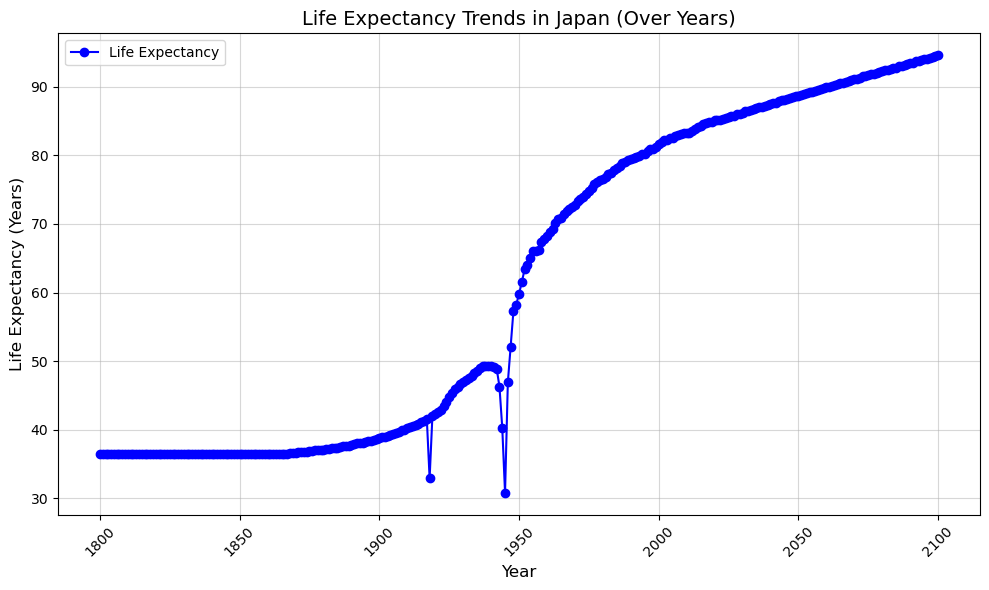

In [40]:
import matplotlib.pyplot as plt

# Country selection
selected_country = "Japan"  # Burada istediğiniz ülkeyi belirtebilirsiniz

# Filtering the life expectancy 
country_data = merged_df[merged_df['country'] == selected_country]

# Figure out life expectancy according to years 
plt.figure(figsize=(10, 6))
plt.plot(country_data['year'], country_data['Life_Expectancy'], marker='o', linestyle='-', color='b', label='Life Expectancy')

# Graphic details
plt.title(f"Life Expectancy Trends in {selected_country} (Over Years)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Life Expectancy (Years)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.5)
plt.legend()
plt.tight_layout()

plt.show()
